In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_tips = sns.load_dataset('tips')

In [3]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# what is the avg total bill based upon gender

df_tips.groupby(['sex','smoker']).agg({'total_bill':'mean'})

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [6]:
df_tips.groupby(['sex','smoker']).agg({'total_bill':'mean'}).unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

# Pivot Table

- The pivot table takes a simple column wise data as input, and groups the entries into a two dimensional table that provides multidimensional summarization of data.

In [7]:
df_tips.pivot_table(index = 'sex',columns = 'smoker',values = 'total_bill')  # the default value given will be mean.

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [9]:
df_tips.pivot_table(index = 'sex',columns = 'smoker',values = 'total_bill', aggfunc = 'sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [11]:
df_tips.pivot_table(index = 'sex',columns = 'smoker',values = 'tip', aggfunc = 'sum')

smoker,Yes,No
sex,,
Male,183.07,302.00
Female,96.74,149.77


In [12]:
df_tips.pivot_table(index = 'sex',columns = 'smoker',values = 'tip', aggfunc = 'count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [13]:
df_tips.pivot_table(index = 'sex',columns = 'smoker', aggfunc = 'count')

day     size     time     tip     total_bill    
smoker Yes  No  Yes  No  Yes  No Yes  No        Yes  No
sex                                                    
Male    60  97   60  97   60  97  60  97         60  97
Female  33  54   33  54   33  54  33  54         33  54

In [14]:
df_tips.pivot_table(index = 'sex',columns = 'smoker', aggfunc = 'count')['tip']

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [16]:
df_tips.pivot_table(index = ['sex','smoker'],columns = ['time','day'],values = 'total_bill')

time               Lunch            Dinner                              
day                 Thur        Fri   Thur     Fri        Sat        Sun
sex    smoker                                                           
Male   Yes     19.171000  11.386667    NaN  25.892  21.837778  26.141333
       No      18.486500        NaN    NaN  17.475  19.929063  20.403256
Female Yes     19.218571  13.260000    NaN  12.200  20.266667  16.540000
       No      15.899167  15.980000  18.78  22.750  19.003846  20.824286

In [19]:
df_tips.pivot_table(index = ['sex','smoker'],columns = ['time','day'],aggfunc = {
    'size' : 'count',
    'tip':'max',
    'total_bill':'mean',
})

size                                  tip                     \
time          Lunch             Dinner             Lunch       Dinner         
day            Thur Fri Sat Sun   Thur Fri Sat Sun  Thur   Fri   Thur   Fri   
sex    smoker                                                                 
Male   Yes       10   3   0   0      0   5  27  15  5.00  2.20    NaN  4.73   
       No        20   0   0   0      0   2  32  43  6.70   NaN    NaN  3.50   
Female Yes        7   3   0   0      0   4  15   4  5.00  3.48    NaN  4.30   
       No        24   1   0   0      1   1  13  14  5.17  3.00    3.0  3.25   

                          total_bill                                       \
time                           Lunch            Dinner                      
day              Sat  Sun       Thur        Fri   Thur     Fri        Sat   
sex    smoker                                                               
Male   Yes     10.00  6.5  19.171000  11.386667    NaN  25.892  21.837778   
       No       9.00  6.0  18.486500        NaN    NaN  17.475  19.929063   
Female Yes      6.50  4.0  19.218571  13.260000    NaN  12.200  20.266667   
       No       4.67  5.2  15.899167  15.980000  18.78  22.750  19.003846   

                          
time                      
day                  Sun  
sex    smoker             
Male   Yes     26.141333  
       No      20.403256  
Female Yes     16.540000  
       No      20.824286

In [21]:
df_tips.pivot_table(index = ['sex','smoker'],columns = ['time','day'],values = 'total_bill',aggfunc='sum',margins=True)

time             Lunch                  Dinner                            \
day               Thur    Fri  Sat  Sun   Thur     Fri      Sat      Sun   
sex    smoker                                                              
Male   Yes      191.71  34.16  0.0  0.0   0.00  129.46   589.62   392.12   
       No       369.73   0.00  0.0  0.0   0.00   34.95   637.73   877.34   
Female Yes      134.53  39.78  0.0  0.0   0.00   48.80   304.00    66.16   
       No       381.58  15.98  0.0  0.0  18.78   22.75   247.05   291.54   
All            1077.55  89.92  NaN  NaN  18.78  235.96  1778.40  1627.16   

time               All  
day                     
sex    smoker           
Male   Yes     1337.07  
       No      1919.75  
Female Yes      593.27  
       No       977.68  
All            4827.77

<AxesSubplot:xlabel='day'>

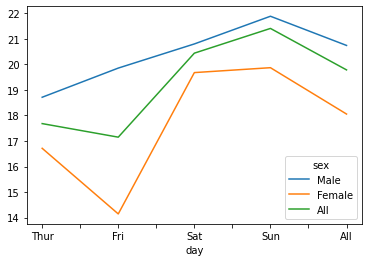

In [31]:
# plotting graphs

df_tips.pivot_table(index = 'day',columns = 'sex',values = 'total_bill',aggfunc='mean',margins=True).plot()
